# Часть 1: Подготовка данных к обучению.

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import math
import seaborn as sns

In [2]:
train = pd.read_csv('X_train.csv')
y=pd.read_csv('y_train.csv')
test = pd.read_csv('X_test.csv')

In [3]:
dataframe = pd.concat([train, y['target']], axis=1)

In [4]:
y = dataframe['target']

In [5]:
y = pd.DataFrame(y)

In [6]:
train.isnull().sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
dtype: int64

In [7]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
105104,0
105105,0
105106,0
105107,0


In [8]:
train['monthly_income'] = train['monthly_income'].fillna(train['monthly_income'].mean(), inplace = False)
train['family_members'] = train['family_members'].fillna(0, inplace = False)

In [9]:
X = train

In [10]:
>>> import numpy as np
>>> from sklearn.impute import SimpleImputer
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SimpleImputer()

SimpleImputer()

In [11]:
X['credit_card_utilization'] = X['credit_card_utilization'].fillna(train.mean(), inplace = False)
X['age'] = X['age'].fillna(train.mean(), inplace = False)
X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(train.mean(), inplace = False)
X['debt_to_income'] = X['debt_to_income'].fillna(train.mean(), inplace = False)
X['monthly_income'] = X['monthly_income'].fillna(train.mean(), inplace = False)
X['credits_loans']=X['credits_loans'].fillna(train.mean(), inplace = False)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(train.mean(), inplace = False)
X['mortgage_loans'] = X['mortgage_loans'].fillna(train.mean(), inplace = False)
X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(train.mean(), inplace = False)
X['family_members'] = X['family_members'].fillna(train.mean(), inplace = False)

In [12]:
X.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [13]:
train.isnull().sum()/train.shape[0]*100

credit_card_utilization       0.0
age                           0.0
overdue_30_59_days            0.0
debt_to_income                0.0
monthly_income                0.0
credits_loans                 0.0
overdue__more_than_90_days    0.0
mortgage_loans                0.0
overdue_60_89_days            0.0
family_members                0.0
dtype: float64

In [14]:
train.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [15]:
X['credit_card_utilization'] = X['credit_card_utilization'].fillna(0).astype(np.float32)
X['age'] = X['age'].fillna(0).astype(np.float32)
X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(0).astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].fillna(0).astype(np.float32)
X['monthly_income'] = X['monthly_income'].fillna(0).astype(np.float32)
X['credits_loans']=X['credits_loans'].fillna(0).astype(np.int32)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(0).astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].fillna(0).astype(np.float32)
X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(0).astype(np.int32)
X['family_members'] = X['family_members'].fillna(0).astype(np.float32)

In [16]:
X = train

In [17]:
df = pd.concat([X['overdue_30_59_days'], X['overdue_60_89_days'], X['overdue__more_than_90_days'], X['monthly_income']], axis=1)
df

,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,monthly_income
0,0,0,0,6823.894531
1,1,0,0,356.580780
2,1,0,0,20349.896484
3,0,0,0,2894.368896
4,0,0,0,24833.228516
...,...,...,...,...
105104,0,0,0,9928.125000
105105,0,0,0,2187.355957
105106,1,0,0,3961.841064
105107,0,1,0,3705.546631


# Импортируем полиномиальные фичи

In [18]:
poly_features_df = df[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
poly_features_test_df = df[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

#poly_target = y['target']
#poly_features = poly_features.drop(columns = ['target'])

poly_features_df = imputer.fit_transform(poly_features_df)
poly_features_test_df = imputer.transform(poly_features_test_df)

from sklearn.preprocessing import PolynomialFeatures

# Создаем объект PolynomialFeatures, указав степень взаимодействия, равную 3
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features_df)
poly_features_df = poly_transformer.transform(poly_features_df)
poly_features_test_df = poly_transformer.transform(poly_features_test_df)
print('Polynomial Features shape: ', poly_features_df.shape)

Polynomial Features shape:  (105109, 35)


In [19]:
poly_features_df

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.17758310e+11],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.53391937e+07],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.42726427e+12],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.21857888e+10],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.08811418e+10],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95440004e+11]])

In [20]:
poly_features_df = pd.DataFrame(poly_features_df, 
                             columns = poly_transformer.get_feature_names(['overdue_30_59_days', 'overdue_60_89_days', 
                                                                           'overdue__more_than_90_days', 'monthly_income']))

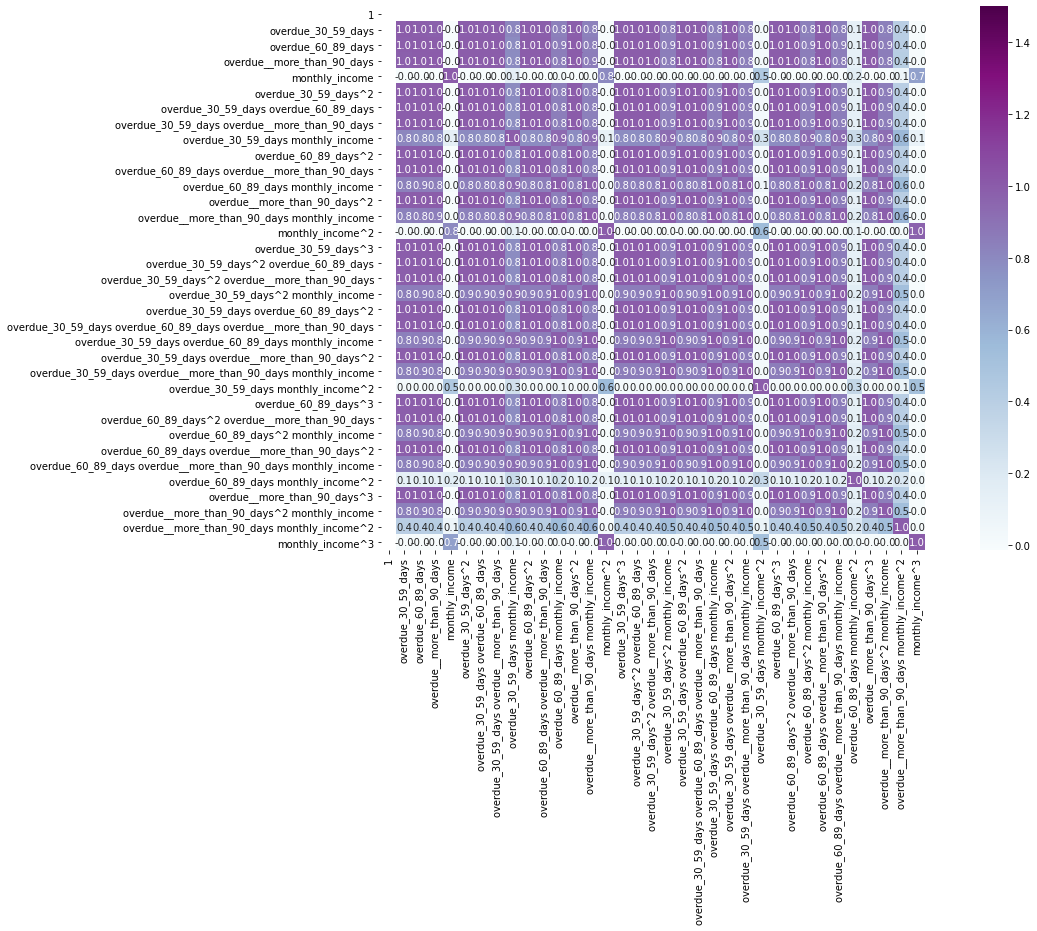

In [21]:
matrix = poly_features_df.corr() 
f, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [22]:
poly_features_df

,1,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,monthly_income,overdue_30_59_days^2,overdue_30_59_days overdue_60_89_days,overdue_30_59_days overdue__more_than_90_days,overdue_30_59_days monthly_income,overdue_60_89_days^2,...,overdue_60_89_days^3,overdue_60_89_days^2 overdue__more_than_90_days,overdue_60_89_days^2 monthly_income,overdue_60_89_days overdue__more_than_90_days^2,overdue_60_89_days overdue__more_than_90_days monthly_income,overdue_60_89_days monthly_income^2,overdue__more_than_90_days^3,overdue__more_than_90_days^2 monthly_income,overdue__more_than_90_days monthly_income^2,monthly_income^3
0,1.0,0.0,0.0,0.0,6823.894531,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,3.177583e+11
1,1.0,1.0,0.0,0.0,356.580780,1.0,0.0,0.0,356.580780,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,4.533919e+07
2,1.0,1.0,0.0,0.0,20349.896484,1.0,0.0,0.0,20349.896484,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,8.427264e+12
3,1.0,0.0,0.0,0.0,2894.368896,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.424720e+10
4,1.0,0.0,0.0,0.0,24833.228516,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.531438e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105104,1.0,0.0,0.0,0.0,9928.125000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,9.785921e+11
105105,1.0,0.0,0.0,0.0,2187.355957,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.046546e+10
105106,1.0,1.0,0.0,0.0,3961.841064,1.0,0.0,0.0,3961.841064,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,6.218579e+10
105107,1.0,0.0,1.0,0.0,3705.546631,0.0,0.0,0.0,0.000000,1.0,...,1.0,0.0,3705.546631,0.0,0.0,1.373108e+07,0.0,0.0,0.0,5.088114e+10


In [23]:
df_1 = pd.concat([poly_features_df['overdue_30_59_days monthly_income^2'], poly_features_df['overdue_60_89_days monthly_income^2'], poly_features_df['overdue__more_than_90_days monthly_income^2']], axis=1)

In [24]:
df_1 = pd.DataFrame(df_1)

In [25]:
df_1

,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,0.000000e+00,0.000000e+00,0.0
1,1.271499e+05,0.000000e+00,0.0
2,4.141183e+08,0.000000e+00,0.0
3,0.000000e+00,0.000000e+00,0.0
4,0.000000e+00,0.000000e+00,0.0
...,...,...,...
105104,0.000000e+00,0.000000e+00,0.0
105105,0.000000e+00,0.000000e+00,0.0
105106,1.569618e+07,0.000000e+00,0.0
105107,0.000000e+00,1.373108e+07,0.0


In [26]:
Union = pd.concat([X, df_1], axis=1)

In [27]:
Union = Union.drop(columns = ['overdue_30_59_days', 'overdue_60_89_days'], axis=1)

In [28]:
Union

,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,family_members,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,0.000000,56.0,0.504328,6823.894531,9,0,1.0,5.0,0.000000e+00,0.000000e+00,0.0
1,0.170659,45.0,2.405859,356.580780,5,0,0.0,0.0,1.271499e+05,0.000000e+00,0.0
2,0.342176,75.0,0.445066,20349.896484,9,0,3.0,0.0,4.141183e+08,0.000000e+00,0.0
3,0.046219,50.0,0.814508,2894.368896,12,0,1.0,3.0,0.000000e+00,0.000000e+00,0.0
4,0.679556,58.0,0.390311,24833.228516,15,0,4.0,2.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62.0,0.184589,9928.125000,6,0,2.0,0.0,0.000000e+00,0.000000e+00,0.0
105105,0.980631,25.0,0.158753,2187.355957,3,0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
105106,0.050256,73.0,0.849711,3961.841064,12,0,2.0,0.0,1.569618e+07,0.000000e+00,0.0
105107,0.447882,43.0,0.068033,3705.546631,4,0,0.0,0.0,0.000000e+00,1.373108e+07,0.0


# Итоговая матрица корреляций выглядит следующим образом:

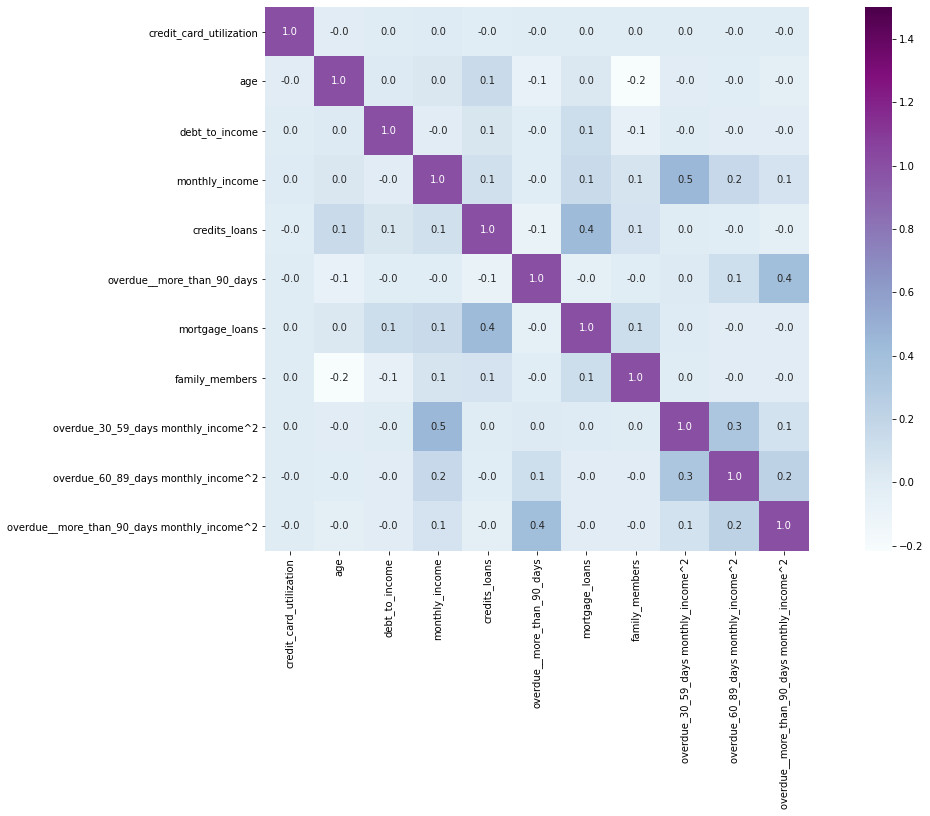

In [29]:
matrix = Union.corr() 
f, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

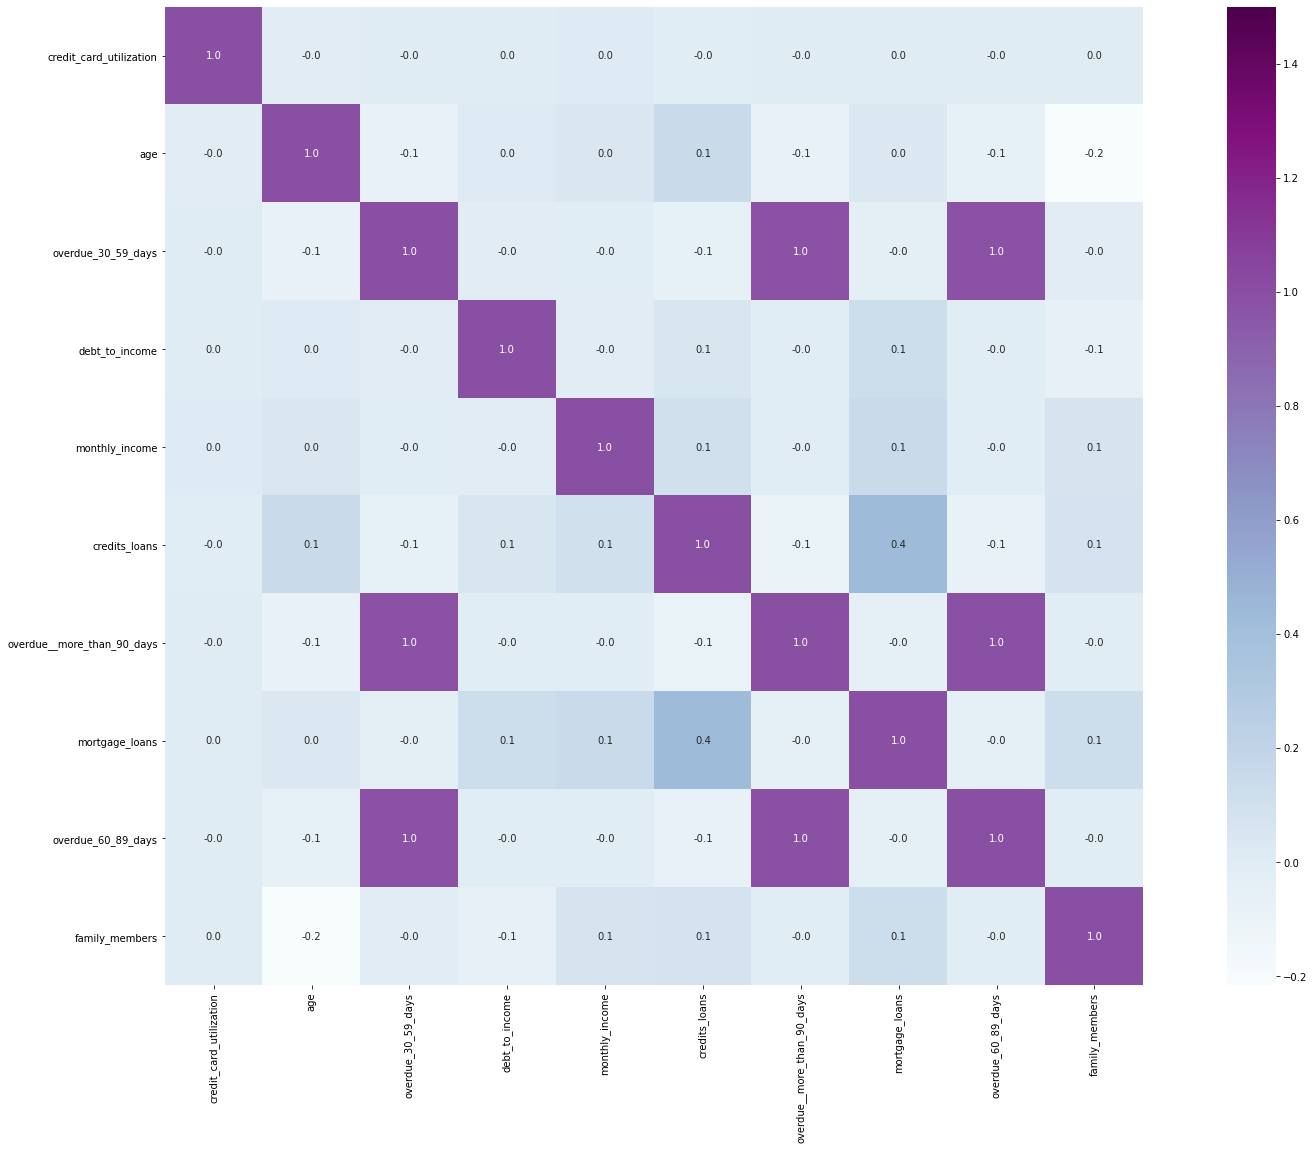

In [31]:
matrix = X.corr() 
f, ax = plt.subplots(figsize=(30, 18)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [32]:
X['credit_card_utilization'] = X['credit_card_utilization'].astype(np.float32)
X['age'] = X['age'].astype(np.float32)
#X['overdue_30_59_days'] = X['overdue_30_59_days'].astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].astype(np.float32)
X['monthly_income'] = X['monthly_income'].astype(np.float32)
X['credits_loans']=X['credits_loans'].astype(np.int32)
#X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].astype(np.float32)
#X['overdue_60_89_days'] = X['overdue_60_89_days'].astype(np.int32)
X['family_members'] = X['family_members'].astype(np.float32)

In [33]:
X.isnull().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

In [34]:
X = Union

In [35]:
X.isnull().sum()

credit_card_utilization                        0
age                                            0
debt_to_income                                 0
monthly_income                                 0
credits_loans                                  0
overdue__more_than_90_days                     0
mortgage_loans                                 0
family_members                                 0
overdue_30_59_days monthly_income^2            0
overdue_60_89_days monthly_income^2            0
overdue__more_than_90_days monthly_income^2    0
dtype: int64

In [36]:
X.dtypes

credit_card_utilization                        float32
age                                            float32
debt_to_income                                 float32
monthly_income                                 float32
credits_loans                                    int32
overdue__more_than_90_days                       int32
mortgage_loans                                 float32
family_members                                 float32
overdue_30_59_days monthly_income^2            float64
overdue_60_89_days monthly_income^2            float64
overdue__more_than_90_days monthly_income^2    float64
dtype: object

In [37]:
X['credit_card_utilization'] = X['credit_card_utilization'].fillna(0).astype(np.float32)
X['age'] = X['age'].fillna(0).astype(np.float32)
#X['overdue_30_59_days'] = X['overdue_30_59_days'].fillna(0).astype(np.int32)
X['debt_to_income'] = X['debt_to_income'].fillna(0).astype(np.float32)
X['monthly_income'] = X['monthly_income'].fillna(0).astype(np.float32)
X['credits_loans']=X['credits_loans'].fillna(0).astype(np.int32)
X['overdue__more_than_90_days'] = X['overdue__more_than_90_days'].fillna(0).astype(np.int32)
X['mortgage_loans'] = X['mortgage_loans'].fillna(0).astype(np.float32)
#X['overdue_60_89_days'] = X['overdue_60_89_days'].fillna(0).astype(np.int32)
X['family_members'] = X['family_members'].fillna(0).astype(np.float32)
X['overdue_30_59_days monthly_income^2'] = X['overdue_30_59_days monthly_income^2'].fillna(0).astype(np.float32)
X['overdue_60_89_days monthly_income^2'] = X['overdue_60_89_days monthly_income^2'].fillna(0).astype(np.float32)
X['overdue__more_than_90_days monthly_income^2'] = X['overdue__more_than_90_days monthly_income^2'].fillna(0).astype(np.float32)

# Часть 2: Разработка моделей. Обучение.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [42]:
from sklearn.metrics import log_loss

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [45]:
from sklearn.linear_model import LogisticRegression

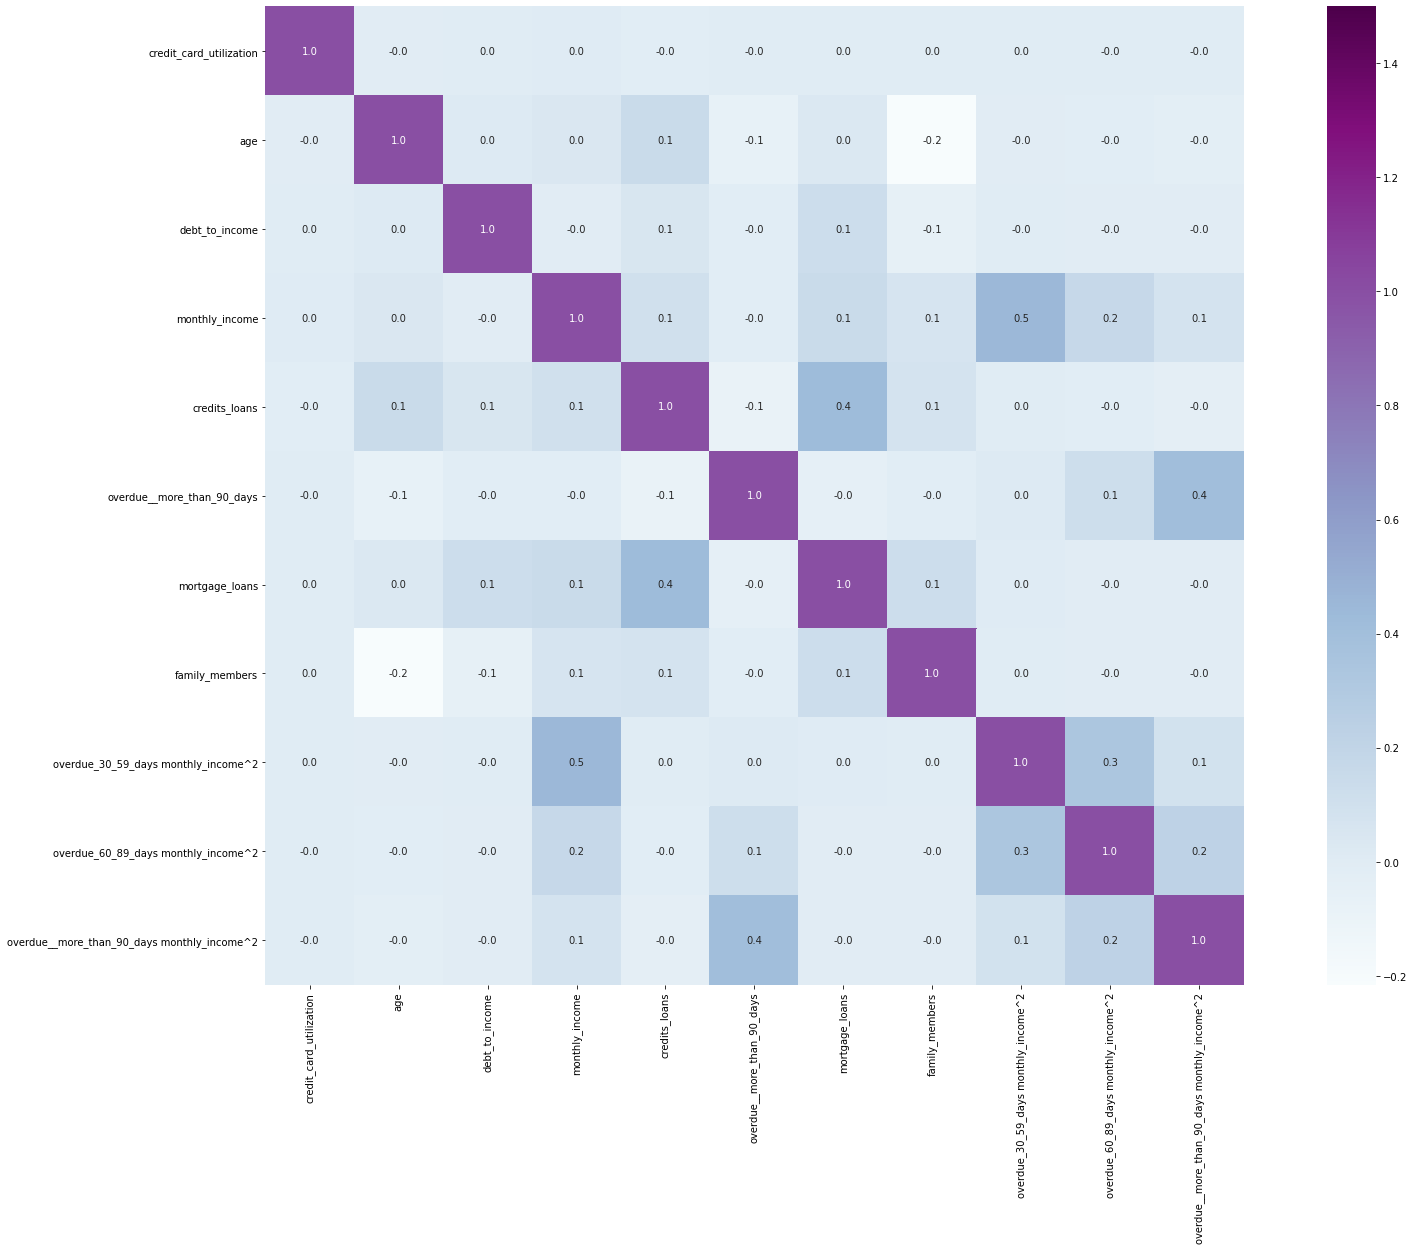

In [46]:
matrix = X.corr() 
f, ax = plt.subplots(figsize=(30, 18)) 
sns.heatmap(matrix, vmax=1.5, square=True,annot=True, fmt=".1f",cmap="BuPu")
plt.show()

In [47]:
X_train

,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,family_members,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
78599,0.909436,45.0,0.029949,684.727234,1,0,0.0,0.0,0.0,0.0,0.0
93212,0.504864,44.0,0.171082,2303.732910,3,0,0.0,2.0,0.0,0.0,0.0
36804,0.105838,78.0,0.294263,2457.278809,7,0,1.0,0.0,0.0,0.0,0.0
22245,0.041331,74.0,28.936274,6649.725098,5,0,0.0,0.0,0.0,0.0,0.0
103484,0.502731,52.0,0.400393,1359.556885,4,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
89321,0.003695,48.0,0.041085,4982.835449,10,0,1.0,0.0,0.0,0.0,0.0
83377,0.052183,79.0,0.496935,5129.032227,6,0,1.0,0.0,0.0,0.0,0.0
22472,0.310907,70.0,0.051433,2673.427002,3,0,0.0,3.0,0.0,0.0,0.0
21691,0.000000,54.0,0.000000,7732.461914,2,0,0.0,2.0,0.0,0.0,0.0


In [48]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

# Нормировка данных:

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler(with_mean=True, with_std=True)

X_scaled = ss.fit_transform(X_train)

X_val_scaled = ss.transform(X_val)

In [60]:
class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = X_traim
    training_set_outputs = y_train

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")
    print (neural_network.think(y_train))

NameError: name 'random' is not defined

In [66]:
!pip install tensorflow
import tensorflow as tf
import keras as k

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=4edd727059a2117aa48f73be5a2e3483f150f96b13195386819a73fcba74db3a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=ac80554a069138f9013fa17a7df37ad062787eb612e0d3ea653c7371a22583dd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anacoda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'tensorflow'

In [68]:
import keras as k

ModuleNotFoundError: No module named 'tensorflow'

In [69]:
pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.40.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none

In [70]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [71]:
import keras as k
import tensorflow as tf

In [74]:
input_data = X_train
output_data = y_train
model = k.Sequential()

model.add(k.layers.Dense(units=1,activation='linear'))

In [78]:
model.compile(loss='mse',optimizer='sgd')
f_res=model.fit(input_data,output_data, epochs=10)

Epoch 1/10
2464/2464 [==============================] - 1s 448us/step - loss: nan
Epoch 2/10
2464/2464 [==============================] - 1s 450us/step - loss: nan
Epoch 3/10
2464/2464 [==============================] - 1s 443us/step - loss: nan
Epoch 4/10
2464/2464 [==============================] - 1s 448us/step - loss: nan
Epoch 5/10
2464/2464 [==============================] - 1s 448us/step - loss: nan
Epoch 6/10
2464/2464 [==============================] - 1s 450us/step - loss: nan
Epoch 7/10
2464/2464 [==============================] - 1s 463us/step - loss: nan
Epoch 8/10
2464/2464 [==============================] - 1s 432us/step - loss: nan
Epoch 9/10
2464/2464 [==============================] - 1s 403us/step - loss: nan
Epoch 10/10
2464/2464 [==============================] - 1s 373us/step - loss: nan


In [81]:
model.predict(z)

NameError: name 'z' is not defined

# DTC

In [48]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [40], 'min_samples_leaf': [10]}#, 'min_samples_leaf': [1]}

cv = StratifiedKFold(shuffle=True, n_splits=5)

In [49]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [50]:
GS_dtc.fit(X=X_scaled, y=y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [10], 'min_samples_split': [40]},
             scoring='roc_auc')

In [51]:
GS_dtc.best_score_

0.7547776734267089

# Logistic Regression:

In [488]:
cv = StratifiedKFold(shuffle=True, n_splits=5)#10

In [489]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0 , 30)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')
# (-7, 0, 20)

In [490]:
GS_LR.fit(X=X_scaled, y=y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 1.74332882e-07, 3.03919538e-07, 5.29831691e-07,
       9.23670857e-07, 1.61026203e-06, 2.80721620e-06, 4.89390092e-06,
       8.53167852e-06, 1.48735211e-05, 2.59294380e-05, 4.52035366e-05,
       7.88046282e-05, 1.37382380e-04, 2.39502662e-04, 4.17531894e-04,
       7.27895384e-04, 1.26896100e-03, 2.21221629e-03, 3.85662042e-03,
       6.72335754e-03, 1.17210230e-02, 2.04335972e-02, 3.56224789e-02,
       6.21016942e-02, 1.08263673e-01, 1.88739182e-01, 3.29034456e-01,
       5.73615251e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [491]:
GS_LR.best_params_

{'C': 1.0}

In [492]:
GS_LR.best_score_

0.6803270976374758

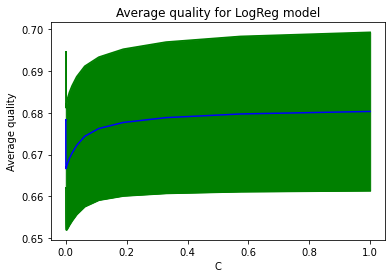

In [493]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LogReg model')
plt.show()

In [494]:
cv = StratifiedKFold(shuffle=True, n_splits=10)#10

In [497]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')
# (-7, 0, 20)      (-15, -3, 100)

In [498]:
GS_LR.fit(X=X_scaled, y=y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [499]:
GS_LR.best_params_

{'C': 1.0}

In [500]:
GS_LR.best_score_

0.6798824925382945

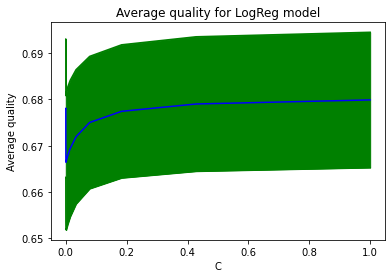

In [501]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LogReg model')
plt.show()

In [502]:
cv = StratifiedKFold(shuffle=True, n_splits=20)#10

In [503]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')
# (-7, 0, 20)

In [504]:
GS_LR.fit(X=X_scaled, y=y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [505]:
GS_LR.best_params_

{'C': 1.0}

In [506]:
GS_LR.best_score_

0.6793277541904749

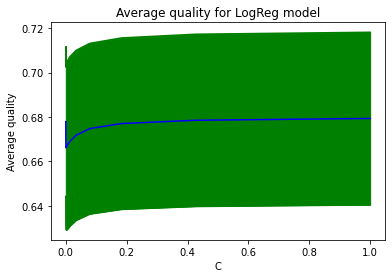

In [507]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LogReg model')
plt.show()

# kNN

In [511]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=10)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [512]:
GS_kNN.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [513]:
GS_kNN.best_params_

{'n_neighbors': 96}

In [514]:
GS_kNN.best_score_

0.7227161332053843

# Кросс-валидация: Было решено выбрать модель kNN

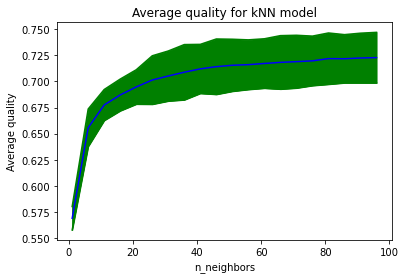

In [516]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

In [517]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN2 = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [518]:
GS_kNN2.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [519]:
GS_kNN2.best_params_

{'n_neighbors': 96}

In [520]:
GS_kNN2.best_score_

0.7186492105018065

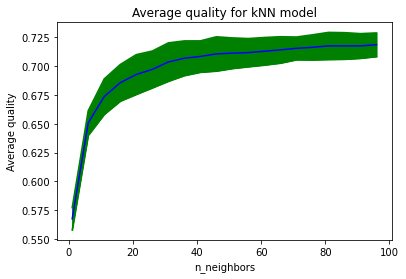

In [521]:
means = GS_kNN2.cv_results_['mean_test_score']
stds = GS_kNN2.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

In [522]:
#Для подбора
model = KNeighborsClassifier()
params = {'n_neighbors': range(1, 100, 5)}#1,100,5,       1, 200, 10
cv = StratifiedKFold(shuffle=True, n_splits=20)
GS_kNN3 = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [523]:
GS_kNN3.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [524]:
GS_kNN3.best_params_

{'n_neighbors': 96}

In [525]:
GS_kNN3.best_score_

0.7234647630924109

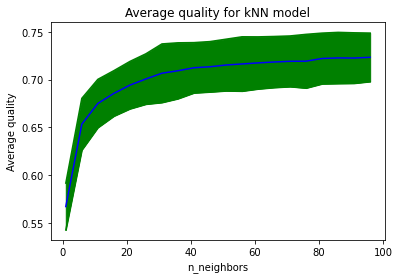

In [526]:
means = GS_kNN3.cv_results_['mean_test_score']
stds = GS_kNN3.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Стандартные модели. ROC-AUC curve:

In [64]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре
DT_model = GS_dtc.best_estimator_ # Лучший ROC_AUC при гиперпараметре

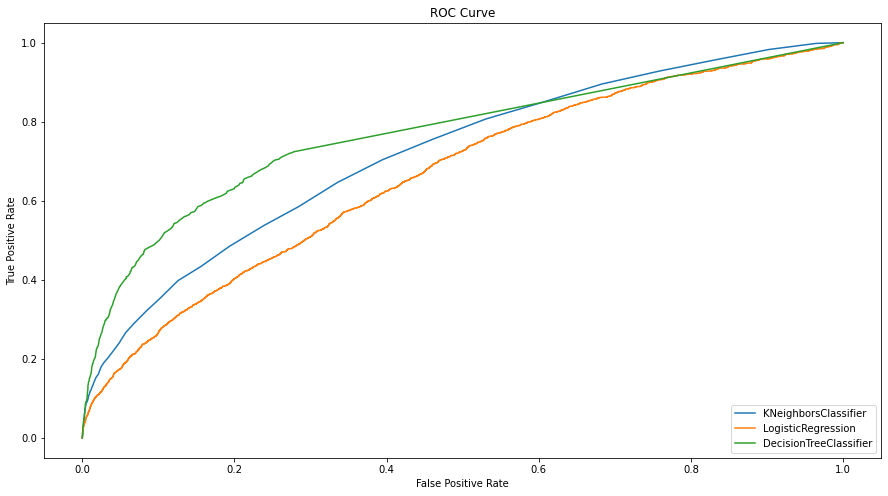

In [65]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [kNN_model, LR_model, DT_model]:  
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(y_val, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)
ax.legend(loc='lower right')
                                          
plt.show()

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Создаём модель леса из сотни деревьев
#model = RandomForestClassifier(n_estimators=181, 
                               #bootstrap = True,
                               #max_features = 'auto')
model = RandomForestClassifier()
params = {'n_estimators': range(1, 400, 20)}
cv = StratifiedKFold(shuffle=True, n_splits=10)
# Обучаем на тренировочных данных
model.fit(X_scaled, y_train)
GS_RFC = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')#341 - n estimators

In [48]:
GS_RFC.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 400, 20)}, scoring='roc_auc')

In [49]:
GS_RFC.best_params_

{'n_estimators': 361}

In [50]:
GS_RFC.best_estimator_

RandomForestClassifier(n_estimators=361)

In [51]:
GS_RFC.best_score_

0.8474047507887853

In [52]:
RFC_model = GS_RFC.best_estimator_

# Gradient Boosting

In [206]:
from sklearn.datasets import make_hastie_10_2
>>> from sklearn.ensemble import GradientBoostingClassifier

>>> clf = GradientBoostingClassifier(learning_rate=5.0,
...     max_depth=5, random_state=0)#(n_estimators=100, learning_rate=2.0,
...     #max_depth=1, random_state=0).fit(X_scaled, y_train)
>>> #clf.score(test, y_val)
params = {'n_estimators': range(1,100, 5)}

In [207]:
X_scaled.shape, y_train.shape

((78831, 11), (78831, 1))

In [208]:
GS_GBC = GridSearchCV(estimator=clf, param_grid=params, cv=cv, scoring='roc_auc')

In [209]:
GS_GBC.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(learning_rate=5.0,
                                                  max_depth=5, random_state=0),
             param_grid={'n_estimators': range(1, 100, 5)}, scoring='roc_auc')

In [210]:
GS_GBC.best_score_

0.8383437996513194

In [211]:
GS_GBC.best_params_

{'n_estimators': 1}

In [212]:
GBC_model = GS_GBC.best_estimator_

In [213]:
GS_GBC.best_estimator_

GradientBoostingClassifier(learning_rate=5.0, max_depth=5, n_estimators=1,
                           random_state=0)

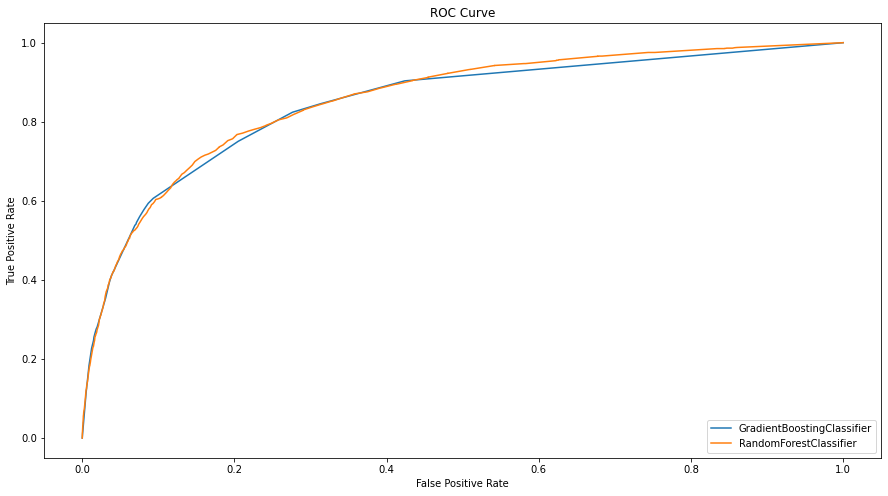

In [214]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [GBC_model, RFC_model]:
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(y_val, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)

ax.legend(loc='lower right')
                                          
plt.show()

In [117]:
roc_value

0.8543902701229058

# Voting Classifiers: стандартные модели и сложные

In [147]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

In [148]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [149]:
GS_kNN.best_estimator_

KNeighborsClassifier(n_neighbors=161)

In [150]:
GS_LR.best_estimator_

LogisticRegression(C=3.274549162877732e-12)

In [116]:
kNN_model = KNeighborsClassifier(n_neighbors=96)
LR_model = LogisticRegression(C= 3.274549162877732*10**(-12))

In [151]:
vc = VotingClassifier([('DTC', DT_model), ('LR', LR_model)], voting='soft')

In [152]:
# Передаем в VotingClassifier наши модели для ансамбля
vc2 = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [153]:
vc3 = VotingClassifier([('kNN', kNN_model), ('DTC', DT_model)], voting='soft')

In [204]:
vc4 = VotingClassifier([('GBC', GBC_model), ('RFC', RFC_model)], voting='soft')

In [154]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [155]:
#LR и DTC
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('DTC',
                                                     DecisionTreeClassifier(min_samples_leaf=10,
                                                                            min_samples_split=40)),
                                                    ('LR',
                                                     LogisticRegression(C=3.274549162877732e-12))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8],
                                     [0.30000000000000004, 0.7], [0.4, 0.6],
                                     [0.5, 0.5],
                                     [0.6000000000000001, 0.3999999999999999],
                                     [0.7000000000000001, 0.29999999999999993],
                                     [0.8, 0.19999999999999996],
                          

In [156]:
grid.best_params_

{'weights': [0.8, 0.19999999999999996]}

In [157]:
# LR и kNN
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации 
grid2 = GridSearchCV(estimator=vc2,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid2.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('kNN',
                                                     KNeighborsClassifier(n_neighbors=161)),
                                                    ('LR',
                                                     LogisticRegression(C=3.274549162877732e-12))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8],
                                     [0.30000000000000004, 0.7], [0.4, 0.6],
                                     [0.5, 0.5],
                                     [0.6000000000000001, 0.3999999999999999],
                                     [0.7000000000000001, 0.29999999999999993],
                                     [0.8, 0.19999999999999996],
                                     [0.9, 0.09999999999999998], [1.0, 0.0]]},
             scoring='roc_auc')

In [158]:
# DTC и kNN
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации 
grid3 = GridSearchCV(estimator=vc3,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid3.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('kNN',
                                                     KNeighborsClassifier(n_neighbors=161)),
                                                    ('DTC',
                                                     DecisionTreeClassifier(min_samples_leaf=10,
                                                                            min_samples_split=40))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8],
                                     [0.30000000000000004, 0.7], [0.4, 0.6],
                                     [0.5, 0.5],
                                     [0.6000000000000001, 0.3999999999999999],
                                     [0.7000000000000001, 0.29999999999999993],
                                     [0.8, 0.19999999999999996],
                               

In [322]:
# RFC и GBC
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации 
grid4 = GridSearchCV(estimator=vc4,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid4.fit(X_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('GBC',
                                                     GradientBoostingClassifier(learning_rate=5.0,
                                                                                max_depth=5,
                                                                                n_estimators=1,
                                                                                random_state=0)),
                                                    ('RFC',
                                                     RandomForestClassifier(n_estimators=381))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8],
                                     [0.30000000000000004, 0.7], [0.4, 0.6],
                                     [0.5, 0.5],
                                     [0.6000000000000001, 0.399

In [159]:
# !Перебрать различные модели grid'ом и пробовать лучшие параметры!

In [217]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля LogReg и DTC =", grid.best_score_)

Качество алгоритма kNN = 0.7240798390523792
Качество алгоритма LogReg = 0.6827770002963165
Качество алгоритма ансамбля LogReg и DTC = 0.7845260542352785


In [161]:
# Напомним
print("Качество алгоритма ансамбля kNN и LogReg =", grid2.best_score_)
print("Качество алгоритма ансамбля kNN и DTC =", grid3.best_score_)

Качество алгоритма ансамбля kNN и LogReg = 0.7253337797175804
Качество алгоритма ансамбля kNN и DTC = 0.7946451459607715


In [162]:
grid_model = grid.best_estimator_ # Лучший ROC_AUC при гиперпараметре
grid2_model = grid2.best_estimator_ # Лучший ROC_AUC при гиперпараметре
grid3_model = grid3.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [323]:
print("Качество алгоритма ансамбля GBC и RFC =", grid4.best_score_)

Качество алгоритма ансамбля GBC и RFC = 0.8515825247347639


In [222]:
grid.best_estimator_

VotingClassifier(estimators=[('DTC',
                              DecisionTreeClassifier(min_samples_leaf=10,
                                                     min_samples_split=40)),
                             ('LR',
                              LogisticRegression(C=3.274549162877732e-12))],
                 voting='soft', weights=[0.8, 0.19999999999999996])

In [324]:
grid4.best_estimator_

VotingClassifier(estimators=[('GBC',
                              GradientBoostingClassifier(learning_rate=5.0,
                                                         max_depth=5,
                                                         n_estimators=1,
                                                         random_state=0)),
                             ('RFC', RandomForestClassifier(n_estimators=381))],
                 voting='soft', weights=[0.9, 0.09999999999999998])

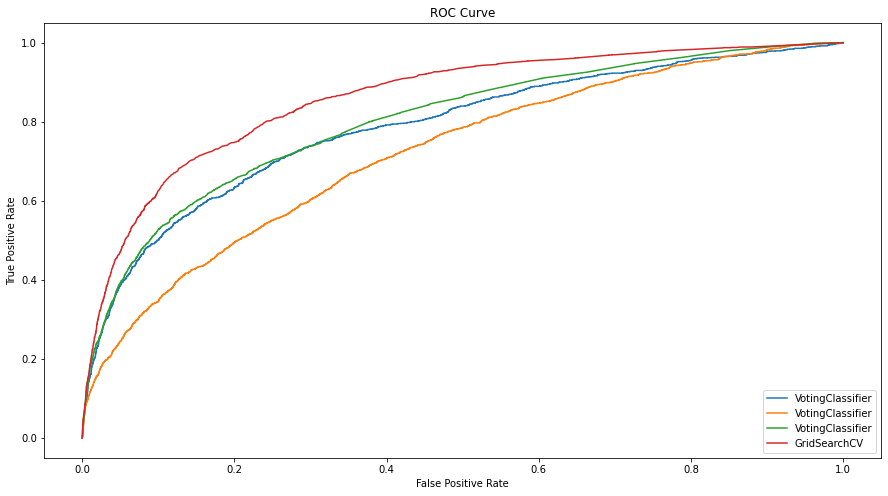

In [325]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [grid_model, grid2_model, grid3_model, grid4]:
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(y_val, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)

ax.legend(loc='lower right')
                                          
plt.show()

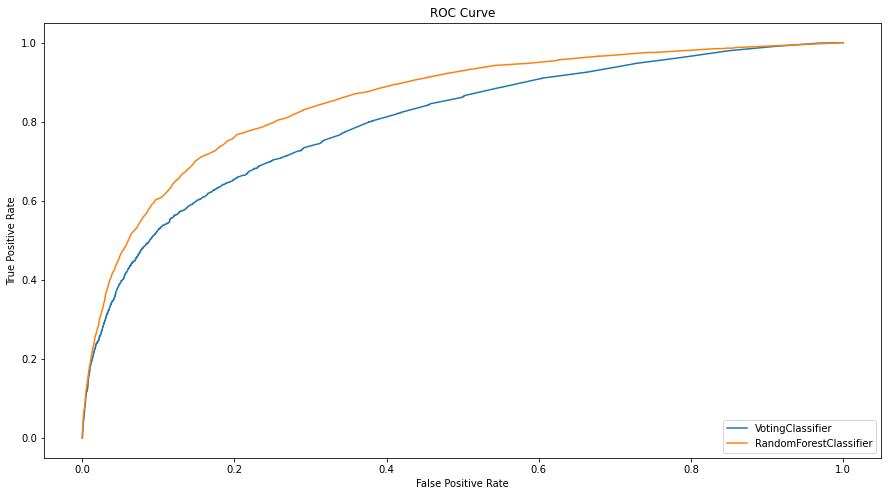

In [201]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [grid3_model, RFC_model]:
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(y_val, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)

ax.legend(loc='lower right')
                                          
plt.show()

# Pipeline

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [115]:
class FeauresTransform(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, df):
        return df

In [162]:
# 3 answ3
vc = VotingClassifier([('kNN', KNeighborsClassifier(**GS_kNN.best_params_)),
                       ('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft', weights = [0.1,0.9])

In [155]:
vc = VotingClassifier([('dtc', DecisionTreeClassifier(**GS_dtc.best_params_)), 
                       ('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft', weights = [0.30000000000000004, 0.7])

In [166]:
#answ
vc = VotingClassifier([('kNN', KNeighborsClassifier(**GS_kNN.best_params_)),
                    ('dtc', DecisionTreeClassifier(**GS_dtc.best_params_))], voting='soft', weights =  [0.6000000000000001, 0.3999999999999999])#, weights = [0.6, 0.4])

In [291]:
#answ4
vc = VotingClassifier([('kNN', KNeighborsClassifier(**GS_kNN.best_params_)),
                    ('dtc', DecisionTreeClassifier(**GS_dtc.best_params_)),
                      ('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft')

In [359]:
vc4 = VotingClassifier([('GBC', GBC_model), ('RFC', RFC_model)], voting='soft', weights =[0.9, 0.09999999999999998])

# Были испробованы различные веса. Лучшими моделями по метрике ROC-AUC оказались:

1) Random Forest Classifier, 2) VC4 (Gradient Boosting and Random Forest).

Принято решение предсказывать с помощью модели 1) RFC. Подробнее в разделе "Валидация".

In [139]:
pipe = Pipeline([('features', FeauresTransform()),
                 #('cats', OneHotEncoder(cols=cat)),   #нет категориальных признаков
                 ('scaler', StandardScaler()),
                 ('best_model', RFC_model) #vc
                ])

In [141]:
a_p = pipe.fit(X, y)

In [142]:
a_p

Pipeline(steps=[('features', FeauresTransform()), ('scaler', StandardScaler()),
                ('best_model', RandomForestClassifier(n_estimators=361))])

# Часть 3. Делаем предсказание

Сначала подготовка данных:

In [117]:
test = pd.read_csv('X_test.csv')

In [118]:
test['monthly_income'] = test['monthly_income'].fillna(test['monthly_income'].mean(), inplace = False)
test['family_members'] = test['family_members'].fillna(0, inplace = False)

In [119]:
test['credit_card_utilization'] = test['credit_card_utilization'].fillna(test.mean(), inplace = False)
test['age'] = test['age'].fillna(test.mean(), inplace = False)
test['overdue_30_59_days'] = test['overdue_30_59_days'].fillna(test.mean(), inplace = False)
test['debt_to_income'] = test['debt_to_income'].fillna(test.mean(), inplace = False)
test['monthly_income'] = test['monthly_income'].fillna(test.mean(), inplace = False)
test['credits_loans']=test['credits_loans'].fillna(test.mean(), inplace = False)
test['overdue__more_than_90_days'] = test['overdue__more_than_90_days'].fillna(test.mean(), inplace = False)
test['mortgage_loans'] = test['mortgage_loans'].fillna(test.mean(), inplace = False)
test['overdue_60_89_days'] = test['overdue_60_89_days'].fillna(test.mean(), inplace = False)
test['family_members'] = test['family_members'].fillna(test.mean(), inplace = False)

In [120]:
test['credit_card_utilization'] = test['credit_card_utilization'].astype(np.float32)
test['age'] = test['age'].astype(np.float32)
test['overdue_30_59_days'] = test['overdue_30_59_days'].astype(np.int32)
test['debt_to_income'] = test['debt_to_income'].astype(np.float32)
test['monthly_income'] = test['monthly_income'].astype(np.float32)
test['credits_loans']=test['credits_loans'].astype(np.int32)
test['overdue__more_than_90_days'] = test['overdue__more_than_90_days'].astype(np.int32)
test['mortgage_loans'] = test['mortgage_loans'].astype(np.float32)
test['overdue_60_89_days'] = test['overdue_60_89_days'].astype(np.int32)
test['family_members'] = test['family_members'].astype(np.float32)

In [121]:
df_test = pd.concat([test['overdue_30_59_days'], test['overdue_60_89_days'], test['overdue__more_than_90_days'], test['monthly_income']], axis=1)
df_test

,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,monthly_income
0,0,0,0,14403.715820
1,0,0,0,6768.582031
2,1,0,0,4686.080566
3,0,0,0,3867.175293
4,0,0,0,9869.273438
...,...,...,...,...
38871,0,0,0,3474.894287
38872,0,0,0,4170.426270
38873,0,0,0,6726.127930
38874,0,0,0,5441.458984


In [122]:
poly_features_test = df_test[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
#poly_features_test_df = df[['overdue_30_59_days', 'overdue_60_89_days', 'overdue__more_than_90_days', 'monthly_income']]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

#poly_target = y['target']
#poly_features = poly_features.drop(columns = ['target'])

poly_features_test = imputer.fit_transform(poly_features_test)
#poly_features_test_df = imputer.transform(poly_features_test_df)

from sklearn.preprocessing import PolynomialFeatures

# Создаем объект PolynomialFeatures, указав степень взаимодействия, равную 3
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features_test)
poly_features_test = poly_transformer.transform(poly_features_test)
#poly_features_test_df = poly_transformer.transform(poly_features_test_df)
print('Polynomial Features shape: ', poly_features_df.shape)

Polynomial Features shape:  (105109, 35)


In [123]:
poly_features_test = pd.DataFrame(poly_features_test, 
                             columns = poly_transformer.get_feature_names(['overdue_30_59_days', 'overdue_60_89_days', 
                                                                           'overdue__more_than_90_days', 'monthly_income']))

In [124]:
df_1_test = pd.concat([poly_features_test['overdue_30_59_days monthly_income^2'], poly_features_test['overdue_60_89_days monthly_income^2'], poly_features_test['overdue__more_than_90_days monthly_income^2']], axis=1)

In [125]:
df_1_test = pd.DataFrame(df_1_test)

In [126]:
df_1_test

,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,0.000000e+00,0.0,0.0
1,0.000000e+00,0.0,0.0
2,2.195935e+07,0.0,0.0
3,0.000000e+00,0.0,0.0
4,0.000000e+00,0.0,0.0
...,...,...,...
38871,0.000000e+00,0.0,0.0
38872,0.000000e+00,0.0,0.0
38873,0.000000e+00,0.0,0.0
38874,0.000000e+00,0.0,0.0


In [127]:
Union_test = pd.concat([test, df_1_test], axis=1)

In [128]:
Union_test = Union_test.drop(columns = ['overdue_30_59_days', 'overdue_60_89_days'], axis=1)

In [129]:
test = Union_test

In [131]:
test

,index,credit_card_utilization,age,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,family_members,overdue_30_59_days monthly_income^2,overdue_60_89_days monthly_income^2,overdue__more_than_90_days monthly_income^2
0,143522,0.021069,60.0,0.184907,14403.715820,9,0,1.0,0.0,0.000000e+00,0.0,0.0
1,116747,0.009985,82.0,0.446264,6768.582031,6,0,3.0,0.0,0.000000e+00,0.0,0.0
2,66075,0.535187,43.0,0.406317,4686.080566,14,0,2.0,3.0,2.195935e+07,0.0,0.0
3,133292,0.051264,31.0,0.311893,3867.175293,8,0,0.0,1.0,0.000000e+00,0.0,0.0
4,83134,0.069525,45.0,0.294956,9869.273438,6,0,1.0,2.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38871,44475,0.731740,39.0,0.251005,3474.894287,5,0,0.0,0.0,0.000000e+00,0.0,0.0
38872,103189,0.010959,70.0,0.152539,4170.426270,14,0,1.0,0.0,0.000000e+00,0.0,0.0
38873,48732,0.084612,52.0,5288.053711,6726.127930,15,0,2.0,0.0,0.000000e+00,0.0,0.0
38874,135410,0.741717,51.0,0.378356,5441.458984,9,0,2.0,0.0,0.000000e+00,0.0,0.0


In [132]:
index = test['index']

In [133]:
test = test.drop(columns = ['index'], axis=1)

In [135]:
index = pd.DataFrame(index)
index

,index
0,143522
1,116747
2,66075
3,133292
4,83134
...,...
38871,44475
38872,103189
38873,48732
38874,135410


In [143]:
preds = pipe.predict_proba(test)[:, 1]

In [144]:
test['Target1'] = preds

In [147]:
test[['Target1']].to_csv('y_test_sample_not2.csv')

In [148]:
answ2 = pd.read_csv('y_test_sample_not2.csv')

In [149]:
index['target'] = answ2['Target1']

In [150]:
index.to_csv('answ2.csv', index = False)

In [151]:
index

,index,target
0,143522,0.000000
1,116747,0.055402
2,66075,0.196676
3,133292,0.047091
4,83134,0.011080
...,...,...
38871,44475,0.038781
38872,103189,0.000000
38873,48732,0.008310
38874,135410,0.036011
